In [1]:
from utils import create_datasets_and_directories,load_img,plot_history,plot_random_imgs_from_train
import os
from keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam


2023-05-25 23:42:41.644678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 23:42:41.779123: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-25 23:42:42.365562: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/basile/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-25 23:42:42.365638: W te

Load data

In [2]:
##### PARAMETERSpath = "/home/basile/Documents/projet_bees_detection_basile/data_bees_detection/benchmark_classification/1_VGG_16_300_imgs_2_species" #####
PATH_TO_DATASET ="/home/basile/Documents/projet_bees_detection_basile/bees_detection/src/datafiles/final_datafiles/dataset_yolo_cropped_with_cleaned_structure.csv"
OUTPUT_FOLDER = "/home/basile/Documents/projet_bees_detection_basile/dataprint_bees_detection/benchmark_classification/2_Resnet_1000_imgs_2_species_256/"
IMG_SIZE = 256
CAP = 20000
NB_IMG_TO_KEEP = 1000
BACTH_SIZE = 32
##### PARAMETERS #####


# Create the datasets and directories
train_dataset, val_dataset, test_dataset=create_datasets_and_directories(path_to_csv=PATH_TO_DATASET, path_to_output=OUTPUT_FOLDER, image_size=IMG_SIZE, cap=CAP, nb_img_to_keep=NB_IMG_TO_KEEP)

list = ['train', 'test', 'validation']
CLASSES = ['Apis mellifera', 'Bombus terrestris']
NB_CLASSES = len(CLASSES)


paths = [os.path.join(OUTPUT_FOLDER, i) for i in list]

x_train, y_train = load_img(paths[0],img_size = IMG_SIZE,classes = CLASSES)
x_test, y_test = load_img(paths[1],img_size = IMG_SIZE,classes = CLASSES)
x_val, y_val = load_img(paths[2],img_size = IMG_SIZE,classes = CLASSES)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

Number of species with more than 20000 images : 2
Number of images in the filtered dataset : 69628
--------------------------------------------------
Apis mellifera       49093
Bombus terrestris    20535
Name: Labels, dtype: int64
Found 1400 files belonging to 2 classes.


2023-05-25 23:42:59.947565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-25 23:42:59.959389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-25 23:42:59.959568: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-25 23:42:59.960478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuil

Found 300 files belonging to 2 classes.
Found 300 files belonging to 2 classes.
--------------------------------------------------
--------------------------------------------------
Number of species in the train dataset : 2
Number of images in the train dataset : 1400
--------------------------------------------------
Number of species in the validation dataset : 2
Number of images in the validation dataset : 300
--------------------------------------------------
Number of species in the test dataset : 2
Number of images in the test dataset : 300
--------------------------------------------------
--------------------------------------------------


Make simplest Resnet50 network ! np transfer learning !

In [3]:
from keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

conv_base = ResNet50(include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))


# add a dense layer on top
x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NB_CLASSES, activation='softmax')(x)

model = Model(inputs=conv_base.input, outputs=predictions)

# compile the model
opti = Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opti,metrics=['accuracy'])

In [4]:
# import os 
# os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"



Train it 

In [4]:
history = model.fit(x_train, y_train, epochs=40, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))

Epoch 1/40


2023-05-25 23:43:29.805409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-25 23:43:30.169724: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-25 23:43:30.753933: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.09MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 23:43:30.754193: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.09MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 23:43:30.754200: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to alloca

NotFoundError: Graph execution error:

Detected at node 'model/conv2_block1_0_conv/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/basile/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/basile/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/basile/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/basile/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_6318/660678353.py", line 1, in <module>
      history = model.fit(x_train, y_train, epochs=40, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/basile/.local/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'model/conv2_block1_0_conv/Conv2D'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16868480 bytes.
  Profiling failure on CUDNN engine 1: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16868480 bytes.
  Profiling failure on CUDNN engine 0#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 0: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine 2#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 50331648 bytes.
  Profiling failure on CUDNN engine 2: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 50331648 bytes.
  Profiling failure on CUDNN engine 4#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 639696896 bytes.
  Profiling failure on CUDNN engine 4: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 639696896 bytes.
  Profiling failure on CUDNN engine 5#TC: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 197263360 bytes.
  Profiling failure on CUDNN engine 5: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 197263360 bytes.
	 [[{{node model/conv2_block1_0_conv/Conv2D}}]] [Op:__inference_train_function_13651]

In [ ]:
plot_history(history,metric = 'accuracy')
plot_history(history,metric = 'loss')

The network learns ! We'll add some more epochs to see the long run behavior of ot

In [ ]:
# model.fit(x_train, y_train, epochs=40, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))
# plot_history(history,metric = 'accuracy')
# plot_history(history,metric = 'loss')

Though it is not learning very well, we can try to modify the classifier artictechture somehow to make it overfit

In [ ]:


conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

# freeze the convolutional base
conv_base.trainable = False

x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(NB_CLASSES, activation='softmax')(x)

model = Model(inputs=conv_base.input, outputs=predictions)

# compile the model
opti = Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opti,metrics=['accuracy'])

In [ ]:
# history = model.fit(x_train, y_train, epochs=50, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))

Epoch 1/50


2023-05-25 21:39:10.444509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-25 21:39:10.756095: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-25 21:39:11.212681: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 610.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 21:39:11.212722: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 610.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 21:39:11.338567: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allo

44/44 [==============================] - 19s 369ms/step - loss: 5.4843 - accuracy: 0.5079 - val_loss: 2.4959 - val_accuracy: 0.5033
Epoch 2/50
44/44 [==============================] - 14s 317ms/step - loss: 1.3956 - accuracy: 0.5357 - val_loss: 1.0340 - val_accuracy: 0.5000
Epoch 3/50
44/44 [==============================] - 14s 318ms/step - loss: 1.2405 - accuracy: 0.5236 - val_loss: 0.9490 - val_accuracy: 0.5067
Epoch 4/50
44/44 [==============================] - 14s 321ms/step - loss: 0.7101 - accuracy: 0.5986 - val_loss: 0.7767 - val_accuracy: 0.5300
Epoch 5/50
44/44 [==============================] - 14s 321ms/step - loss: 0.7072 - accuracy: 0.6014 - val_loss: 0.6135 - val_accuracy: 0.6967
Epoch 6/50
44/44 [==============================] - 14s 320ms/step - loss: 0.6672 - accuracy: 0.6257 - val_loss: 0.6466 - val_accuracy: 0.6100
Epoch 7/50
44/44 [==============================] - 14s 320ms/step - loss: 0.8410 - accuracy: 0.5929 - val_loss: 1.0483 - val_accuracy: 0.4967
Epoch 8/50

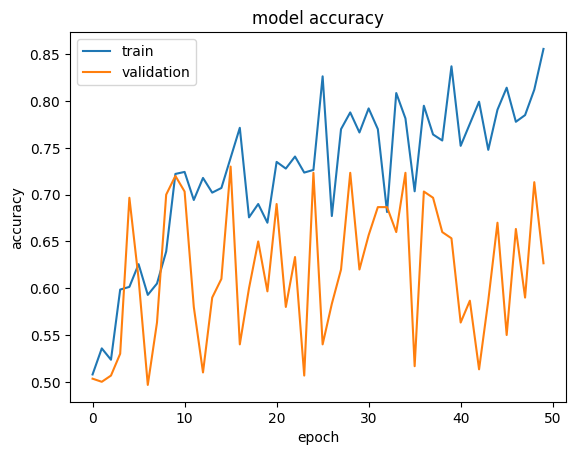

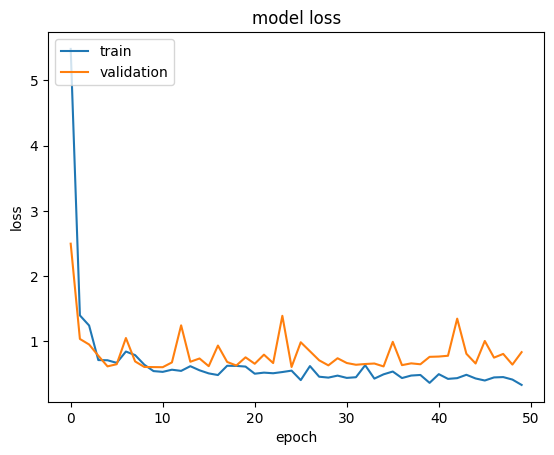

In [ ]:
# plot_history(history,metric = 'accuracy')
# plot_history(history,metric = 'loss')

Model is slighlty starting to overfit at epoch 20 but not that much. We see that adding epochs is not that useful for the moment. We'll try to overfit more with a deeper network

In [ ]:
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

# freeze the convolutional base
conv_base.trainable = False

x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(NB_CLASSES, activation='softmax')(x)

model = Model(inputs=conv_base.input, outputs=predictions)

# compile the model
opti = Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opti,metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))



Epoch 1/15


2023-05-25 22:04:49.155556: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-25 22:04:49.576612: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-25 22:04:50.273490: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 796.14MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:04:50.273555: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 796.14MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:04:50.358624: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allo

 1/44 [..............................] - ETA: 2:47 - loss: 0.6506 - accuracy: 0.6250

2023-05-25 22:04:51.307596: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:04:51.307629: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:04:51.344055: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:04:51.344081: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

44/44 [==============================] - 20s 379ms/step - loss: 3.1161 - accuracy: 0.5000 - val_loss: 0.8453 - val_accuracy: 0.5000
Epoch 2/15
44/44 [==============================] - 14s 319ms/step - loss: 0.9512 - accuracy: 0.5086 - val_loss: 1.3955 - val_accuracy: 0.5000
Epoch 3/15
44/44 [==============================] - 14s 321ms/step - loss: 0.9166 - accuracy: 0.5093 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 4/15
44/44 [==============================] - 14s 322ms/step - loss: 0.8585 - accuracy: 0.5071 - val_loss: 0.7287 - val_accuracy: 0.5000
Epoch 5/15
44/44 [==============================] - 14s 322ms/step - loss: 0.7220 - accuracy: 0.5264 - val_loss: 0.7281 - val_accuracy: 0.5000
Epoch 6/15
44/44 [==============================] - 14s 321ms/step - loss: 0.7054 - accuracy: 0.5557 - val_loss: 0.7537 - val_accuracy: 0.5000
Epoch 7/15
44/44 [==============================] - 14s 321ms/step - loss: 0.7191 - accuracy: 0.5193 - val_loss: 0.6846 - val_accuracy: 0.5233
Epoch 8/15

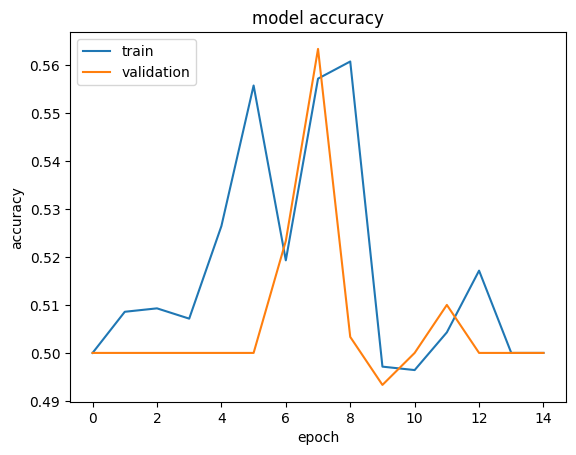

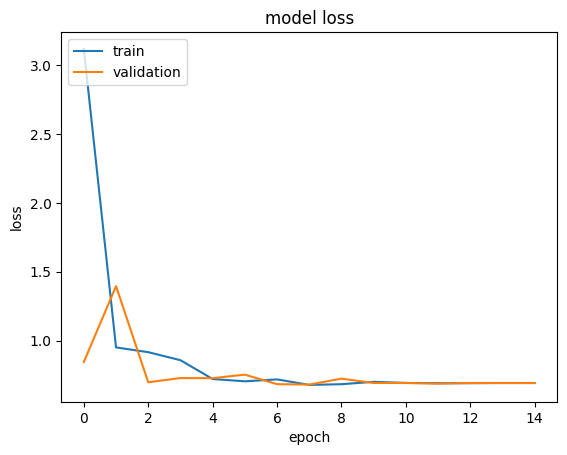

In [ ]:

plot_history(history,metric = 'accuracy')
plot_history(history,metric = 'loss')

HORRIBLE !
Let's try with a slighly less deep

In [ ]:
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

# freeze the convolutional base
conv_base.trainable = False

x = conv_base.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NB_CLASSES, activation='softmax')(x)

model = Model(inputs=conv_base.input, outputs=predictions)

# compile the model
opti = Adam(learning_rate=1e-3)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opti,metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=40, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))

Epoch 1/40


2023-05-25 22:21:54.319970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-25 22:21:54.912503: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-25 22:21:55.582585: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 610.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:21:55.582621: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 610.06MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:21:55.710234: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allo

44/44 [==============================] - 21s 381ms/step - loss: 3.3751 - accuracy: 0.4821 - val_loss: 0.6754 - val_accuracy: 0.6333
Epoch 2/40
44/44 [==============================] - 14s 324ms/step - loss: 0.7776 - accuracy: 0.5107 - val_loss: 0.6935 - val_accuracy: 0.6000
Epoch 3/40
44/44 [==============================] - 14s 325ms/step - loss: 0.7162 - accuracy: 0.5671 - val_loss: 0.6527 - val_accuracy: 0.6467
Epoch 4/40
44/44 [==============================] - 14s 324ms/step - loss: 0.6674 - accuracy: 0.5821 - val_loss: 0.6540 - val_accuracy: 0.5533
Epoch 5/40
44/44 [==============================] - 14s 324ms/step - loss: 0.6770 - accuracy: 0.5879 - val_loss: 0.6585 - val_accuracy: 0.5567
Epoch 6/40
44/44 [==============================] - 14s 324ms/step - loss: 0.6500 - accuracy: 0.5886 - val_loss: 0.6543 - val_accuracy: 0.5567
Epoch 7/40
44/44 [==============================] - 14s 324ms/step - loss: 0.6349 - accuracy: 0.6164 - val_loss: 0.8172 - val_accuracy: 0.5133
Epoch 8/40

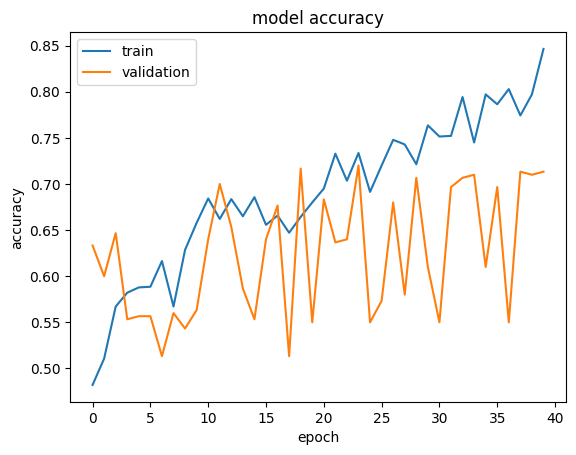

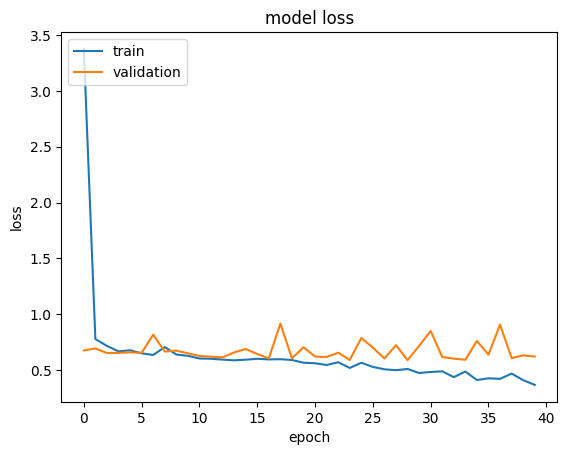

In [ ]:
plot_history(history,metric = 'accuracy')
plot_history(history,metric = 'loss')

Better ! I'll had some momentum and change learning rate of the opti

In [ ]:
opti = Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opti,metrics=['accuracy'])

# history = model.fit(x_train, y_train, epochs=40, batch_size=BACTH_SIZE, validation_data=(x_val, y_val))


Epoch 1/40
44/44 [==============================] - 16s 326ms/step - loss: 0.3618 - accuracy: 0.8379 - val_loss: 0.6186 - val_accuracy: 0.7333
Epoch 2/40
44/44 [==============================] - 14s 317ms/step - loss: 0.3618 - accuracy: 0.8343 - val_loss: 0.7694 - val_accuracy: 0.6400
Epoch 3/40
44/44 [==============================] - 14s 319ms/step - loss: 0.3869 - accuracy: 0.7979 - val_loss: 0.6234 - val_accuracy: 0.7067
Epoch 4/40
44/44 [==============================] - 14s 321ms/step - loss: 0.3342 - accuracy: 0.8536 - val_loss: 0.6305 - val_accuracy: 0.7200
Epoch 5/40
44/44 [==============================] - 14s 321ms/step - loss: 0.3287 - accuracy: 0.8486 - val_loss: 0.6346 - val_accuracy: 0.7133
Epoch 6/40
44/44 [==============================] - 14s 322ms/step - loss: 0.3343 - accuracy: 0.8479 - val_loss: 0.7145 - val_accuracy: 0.6533
Epoch 7/40
44/44 [==============================] - 14s 321ms/step - loss: 0.3514 - accuracy: 0.8300 - val_loss: 0.7311 - val_accuracy: 0.6667

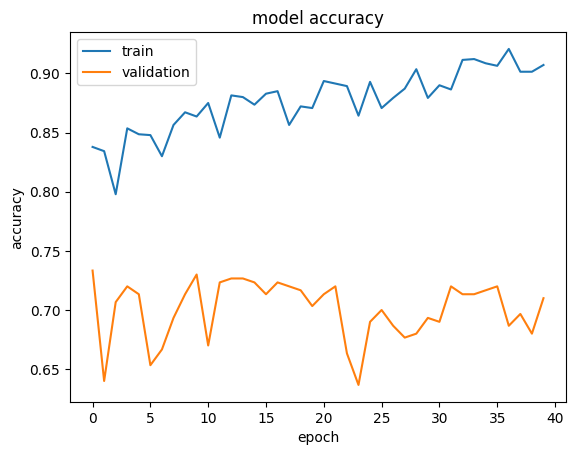

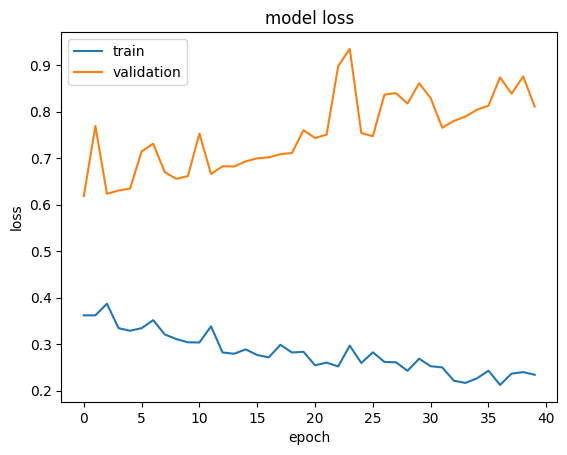

In [ ]:

plot_history(history,metric = 'accuracy')
plot_history(history,metric = 'loss')

Some damned good overfitting !

In [ ]:
# lets put some augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

opti = Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opti,metrics=['accuracy'])



In [ ]:
history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=BACTH_SIZE), epochs=40, validation_data=(x_val, y_val))

/tmp/ipykernel_13349/4195172547.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=BACTH_SIZE), epochs=40, validation_data=(x_val, y_val))


Epoch 1/40


2023-05-25 22:47:05.771750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-25 22:47:06.261632: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 1/44 [..............................] - ETA: 3:11 - loss: 0.7594 - accuracy: 1.0000

2023-05-25 22:47:08.331341: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:08.331374: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:08.399685: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:08.399716: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

25/44 [================>.............] - ETA: 6s - loss: 2.8396 - accuracy: 0.4848

2023-05-25 22:47:16.202589: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:16.202619: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:16.257248: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:16.257273: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

44/44 [==============================] - 22s 401ms/step - loss: 1.9452 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.1100
Epoch 2/40


2023-05-25 22:47:25.640180: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-25 22:47:25.640213: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


44/44 [==============================] - 15s 336ms/step - loss: 0.7703 - accuracy: 0.4893 - val_loss: 0.9491 - val_accuracy: 1.0000
Epoch 3/40
44/44 [==============================] - 15s 338ms/step - loss: 0.7463 - accuracy: 0.4914 - val_loss: 0.6927 - val_accuracy: 0.3900
Epoch 4/40
44/44 [==============================] - 15s 339ms/step - loss: 0.7120 - accuracy: 0.4621 - val_loss: 0.6771 - val_accuracy: 0.2933
Epoch 5/40
44/44 [==============================] - 15s 338ms/step - loss: 0.7155 - accuracy: 0.5129 - val_loss: 0.6780 - val_accuracy: 0.2533
Epoch 6/40
44/44 [==============================] - 15s 338ms/step - loss: 0.7261 - accuracy: 0.4336 - val_loss: 0.6880 - val_accuracy: 0.8900
Epoch 7/40
44/44 [==============================] - 15s 338ms/step - loss: 0.6962 - accuracy: 0.5179 - val_loss: 0.6778 - val_accuracy: 0.3533
Epoch 8/40
44/44 [==============================] - 15s 338ms/step - loss: 0.7140 - accuracy: 0.5179 - val_loss: 0.6947 - val_accuracy: 0.0133
Epoch 9/40

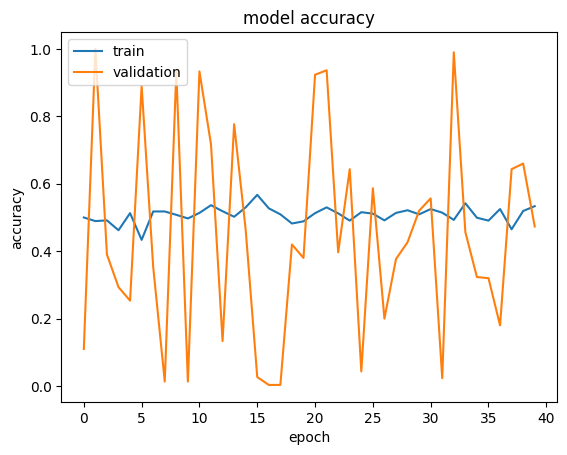

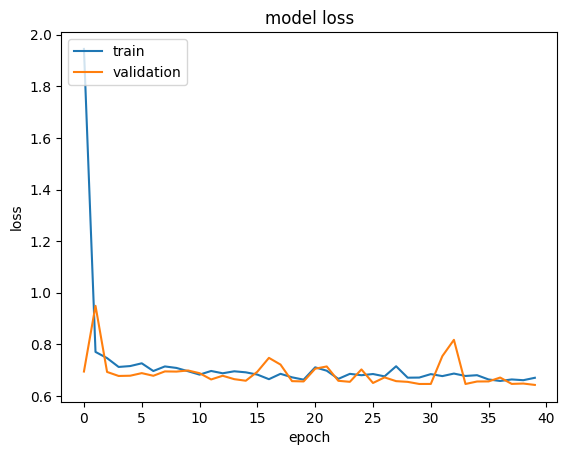

In [ ]:
plot_history(history,metric = 'accuracy')
plot_history(history,metric = 'loss')  

not the best idea i had jajaja

I'll forget this for the moment, and try 